In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('train.csv',index_col=0)
data.head()

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
id,,,,,,,,,
0,133.171875,59.716081,0.043133,-0.703383,54.917224,70.084438,0.749798,-0.649512,0
1,87.093750,36.257973,0.435469,2.266057,3.417224,21.865069,7.039330,52.686251,0
2,112.640625,39.818393,0.379639,0.922306,2.730769,15.689690,8.193471,85.649785,0
3,120.679688,45.918448,-0.098490,0.011775,2.696488,20.954662,8.183874,70.332899,0
4,134.070312,57.720107,-0.107772,-0.573335,1.107860,11.255051,16.107748,308.753765,0


In [12]:
data.tail()

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
id,,,,,,,,,
117559,132.843750,56.748838,-0.060070,-0.554084,4.054348,27.844144,6.564423,44.442664,0
117560,112.578125,52.539271,0.179580,-0.306961,1.637960,15.331913,11.384718,142.535470,0
117561,119.757812,49.980013,0.064402,-0.270822,3.877926,19.788559,6.959740,56.367789,0
117562,105.789062,46.986595,0.441426,0.372466,2.097826,17.170612,9.442445,99.074539,0
117563,113.515625,50.935956,0.031517,-0.443831,23.290970,62.006842,2.386364,4.001859,0


In [33]:
X,Y=data.iloc[:,:-1],data.Class

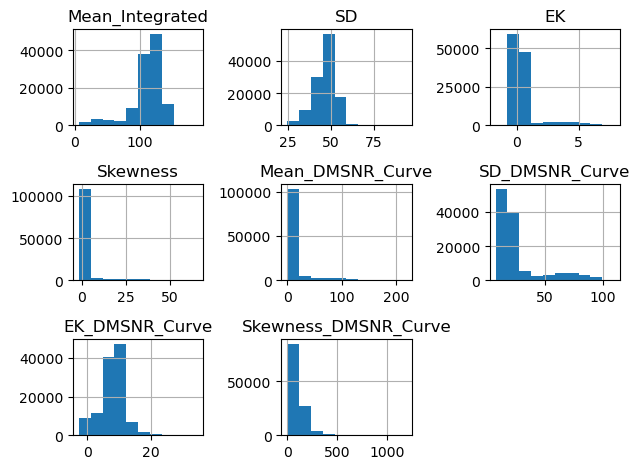

In [34]:
X.hist()
plt.tight_layout()
plt.show()

In [35]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report


x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=.80,random_state=40)

xgb=XGBClassifier()

xgb.fit(x_train,y_train)

pred=xgb.predict(x_test)


print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     21336
           1       0.97      0.93      0.95      2177

    accuracy                           0.99     23513
   macro avg       0.98      0.96      0.97     23513
weighted avg       0.99      0.99      0.99     23513



In [37]:
# prediction

test=pd.read_csv('test.csv',index_col=0)
final=pd.DataFrame(xgb.predict(test))

In [42]:
sub=pd.concat([pd.Series(test.index),final],axis=1,join='outer')
sub.to_csv('submission.csv')